# Лекция 2. Решающие деревья

## Содержание
[2.1 Decision Tree](#2.1)  
[2.2 Немного теории и энтропии](#2.2)  
[2.3 Titanic: ML](#2.3)  
[2.4 Обучение, переобучение, недообучение и кросвалидация](#2.4)  
[2.5 Метрики качества модели](#2.5)  
[2.6 Подбор параметров и ROC](#2.6)  
[2.7 Практика, Scikit-learn, fit, predict](#2.7)

## 2.1 Decision Tree<a id='2.1'></a> 

In [1]:
from sklearn import tree

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [3]:
# Классификатор
clf = tree.DecisionTreeClassifier(criterion='entropy')

# train
X = data[['X_1', 'X_2']]
# predict
y = data.Y

# обучение
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [4]:
# Визуализация
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

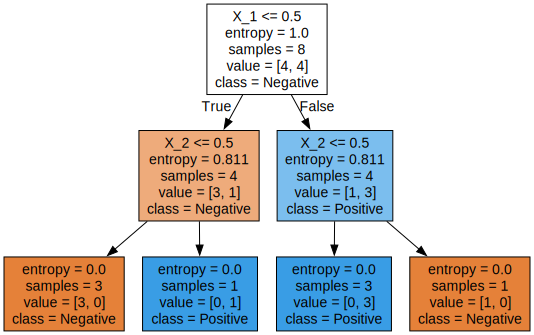

In [5]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))

## 2.2 Немного теории и энтропии<a id='2.2'></a> 

Энтропия определяется как среднее количество информации, получаемой при наблюдении случайной величины. Формула энтропии Шеннона для дискретной случайной величины X с вероятностью p(x) определяется следующим образом:  
$$ E(X)= −∑x∈X  p(x) * log2 p(x)  $$

Свойства энтропии:  
* Энтропия всегда неотрицательна.  
* Энтропия максимальна, когда все события равновероятны.  
* Энтропия уменьшается, когда вероятность некоторых событий увеличивается, а вероятность других событий уменьшается.  
* Энтропия аддитивна, то есть энтропия системы, состоящей из двух независимых подсистем, равна сумме энтропий этих подсистем.  
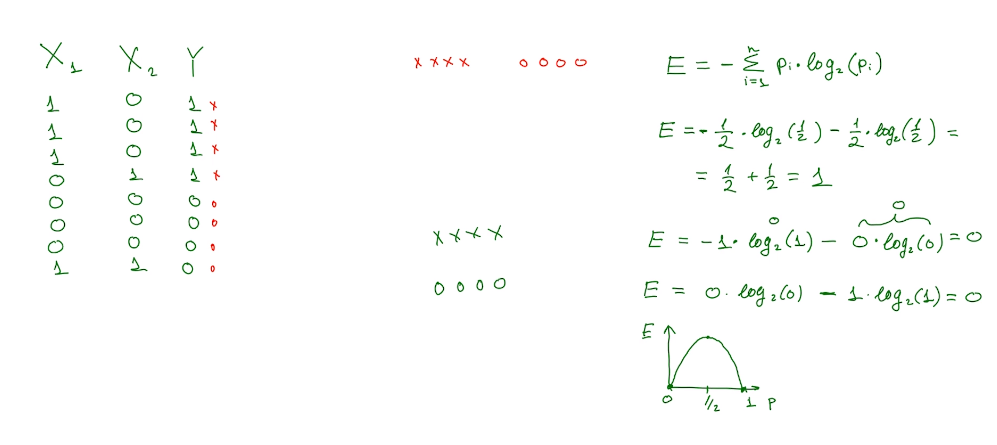  
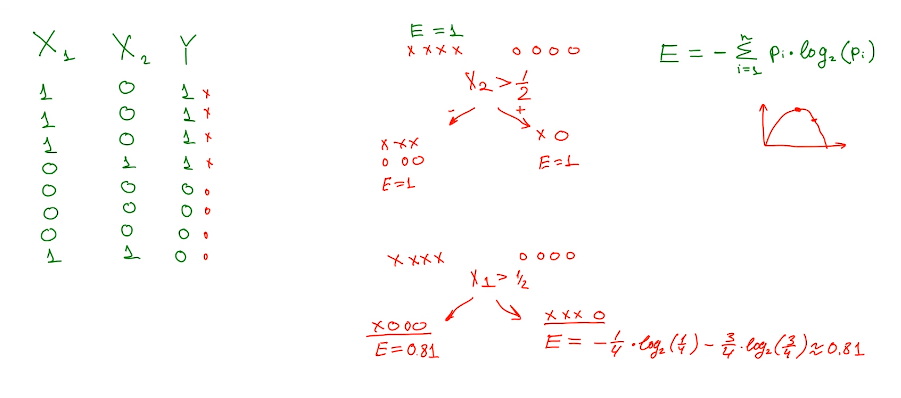  

Information Gain  
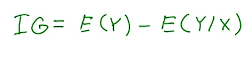  
  
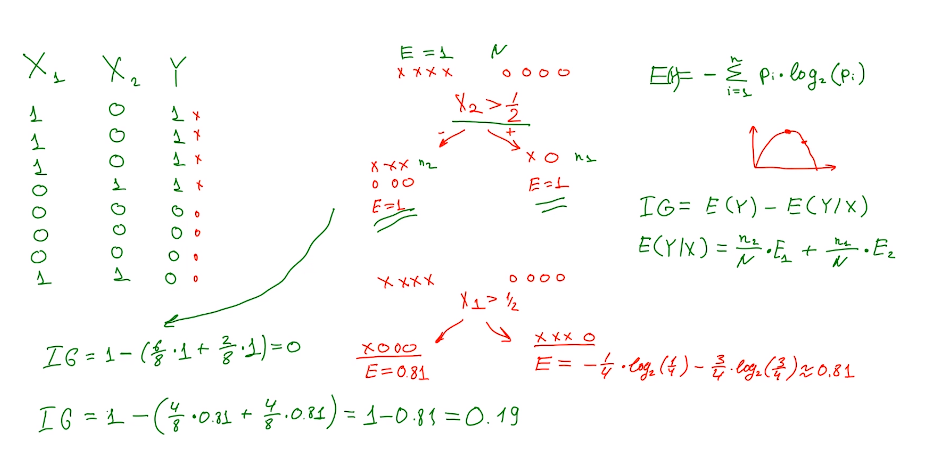  

### Задачи

**1)**  Представьте, что вы решили научить робота для животных отличать собачек от котиков. Для начала проанализируем данные - отметьте все верные утверждения о данном датафрэйме  
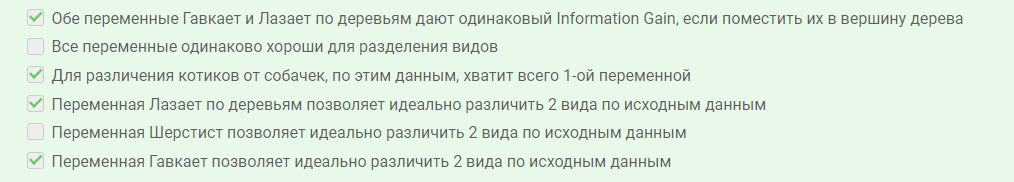

In [1]:
from sklearn import tree

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dogs_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv', index_col = 0)
dogs_df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


[Text(0.5, 0.75, 'Лазает по деревьям <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

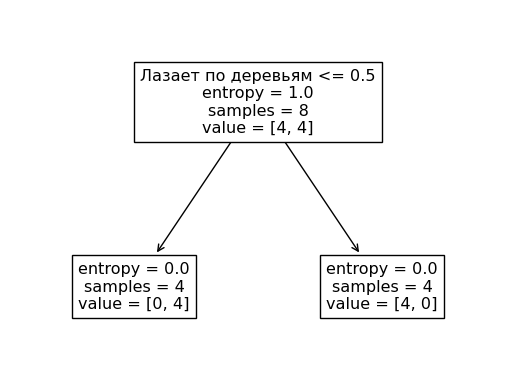

In [3]:
dogs_X = dogs_df.iloc[:, :3]
dogs_y = dogs_df.iloc[:, 3]

dogs_clf = tree.DecisionTreeClassifier(criterion='entropy')
dogs_clf.fit(dogs_X, dogs_y)

tree.plot_tree(dogs_clf, feature_names=dogs_X.columns)

**2)**  
В нашем Big Data датасэте появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, формализуемость разделения на группы.  

**Заполните пропуски**  
Энтропия при разделении по фиче Шерстист в группах, где Шерстист равно 0 и 1 соответственно, составляет и .   
Энтропия при разделении по фиче Гавкает в группах, где Гавкает равно 0 и 1 соответственно, составляет и .   
Энтропия при разделении по фиче Лазает по деревьям в группах, где эта фича равна 0 и 1 соответственно, составляет и .  

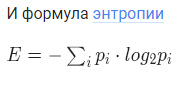

In [4]:
cats_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col = 0)
cats_df

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик
8,1,1,1,котик
9,0,0,1,котик


In [5]:
from scipy.stats import entropy

# Формула: -5/9 * log2(5/9) - 4/9 * log2(4/9)
 
# Энтропия при разделении по фиче Шерстист в группе, где Шерстист равно 0
E1_0 = entropy([1/1, 0/1],base=2)
print(E1_0) # 1 кот не шерстист

# Энтропия при разделении по фиче Шерстист в группе, где Шерстист равно 1
E1_1 = np.round(entropy([5/9, 4/9],base=2), 2)
print(E1_1) # 5 котов и 4 собаки Шерстисты

# Энтропия при разделении по фиче Гавкает в группе, где Гавкает равно 0 
E2_0 = entropy([5/5, 0/5],base=2)
print(E2_0) 

# Энтропия при разделении по фиче Гавкает в группе, где Гавкает равно 1 
E2_1 = np.round(entropy([1/5, 4/5],base=2), 2)
print(E2_1)

# Энтропия при разделении по фиче Лазает по деревьям в группае, где эта фича равна 0
E3_0 = entropy([0/4, 4/4],base=2)
print(E3_0)

# Энтропия при разделении по фиче Лазает по деревьям в группае, где эта фича равна 1
E3_1 = entropy([6/6, 0/6],base=2)
print(E3_1)

0.0
0.99
0.0
0.72
0.0
0.0


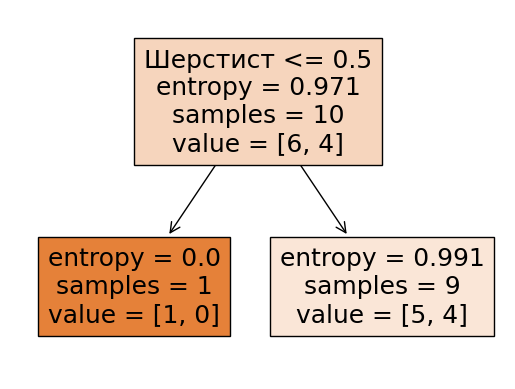

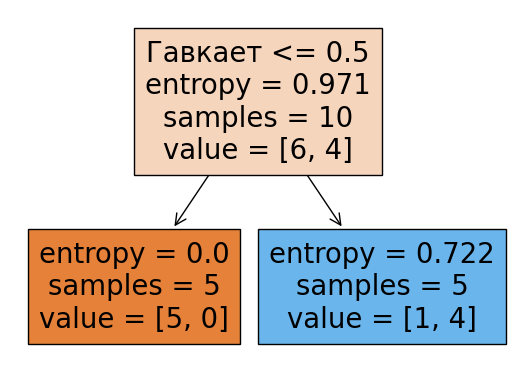

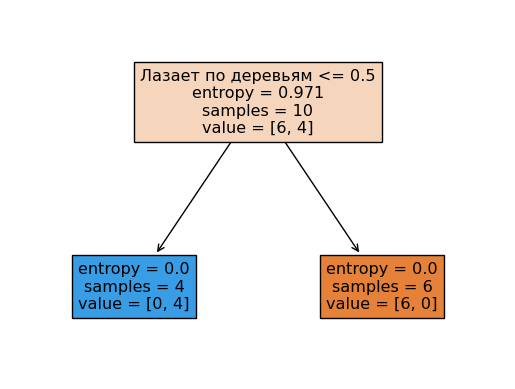

In [6]:
def entropy_check_plot(X_feature = 'Шерстист'):
    cats_y = cats_df.iloc[:, 3]
    cats_X = cats_df[[X_feature]]

    cats_clf = tree.DecisionTreeClassifier(criterion='entropy')
    cats_clf.fit(cats_X, cats_y)

    tree.plot_tree(cats_clf, filled=True ,feature_names=cats_X.columns)

entropy_check_plot('Шерстист')
plt.show()
entropy_check_plot('Гавкает')
plt.show()
entropy_check_plot('Лазает по деревьям')
plt.show()

**3)**  
Ещё немного арифметики - посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые до 2-ого знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании является точка.  

In [7]:
E_y = entropy([4/10, 6/10], base=2) # общая энтропия
E1_X_Y = 1/10 * E1_0 + 9/10 * E1_1 # 1 не шерстист, 9 шерстистых
E2_X_Y = 5/10 * E2_0 + 5/10 * E2_1
E3_X_Y = 4/10 * E3_0 + 6/10 * E3_1

IG_1 = np.round(E_y - E1_X_Y, 2)
IG_2 = np.round(E_y - E2_X_Y, 2)
IG_3 = np.round(E_y - E3_X_Y, 2)
print(IG_1, IG_2, IG_3)

0.08 0.61 0.97


## 2.3 Titanic: ML<a id='2.3'></a> 

In [1]:
from sklearn import tree

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [3]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data.isnull().mean() 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

# заполнение пропущенных значений возраста медианным возрастом по полу
median_age = X.groupby('Sex')['Age'].transform('median')
X = X.fillna({'Age': median_age})

X = pd.get_dummies(X)

X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [7]:
X.isnull().sum().sum()

0

In [8]:
y = titanic_data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [13]:
# число правильных ответов
clf.score(X_train, y_train)

0.8238255033557047

In [14]:
clf.score(X_test, y_test)

0.8203389830508474

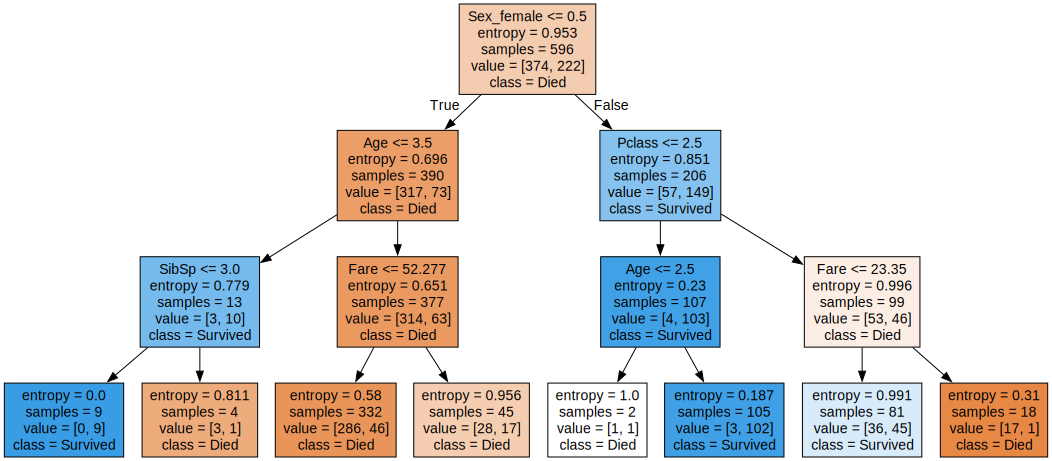

In [15]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Died','Survived'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))

## 2.4 Обучение, переобучение, недообучение и кросвалидация<a id='2.4'></a> 

In [9]:
from sklearn import tree
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import notebook

In [10]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
median_age = X.groupby('Sex')['Age'].transform('median')
X = X.fillna({'Age': median_age})
X = pd.get_dummies(X)
y = titanic_data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
max_depth_values = range(1, 101)
scores_data = pd.DataFrame()

In [12]:
for max_depth in notebook.tqdm(max_depth_values):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
1,2,0.805369,0.776271
2,3,0.823826,0.820339
3,4,0.833893,0.823729
4,5,0.842282,0.810169


In [14]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], 
                           var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.842282


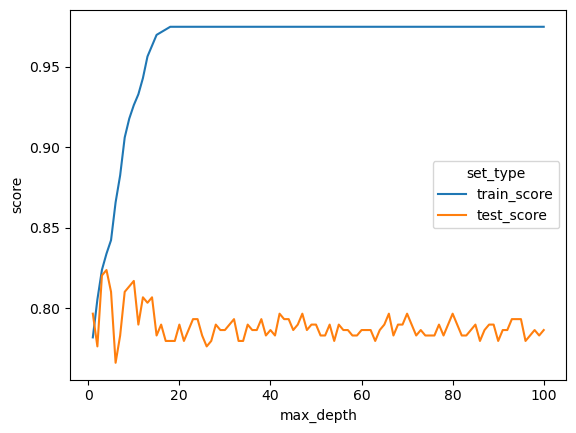

In [15]:
''' train score:
- растет с увеличением глубины дерева
- что не всегда ведет к нахождению общих закономерностей в исследуемых данных

test score:
- изначально невелик (модель еще не доучилась)
- на промежутке 3-5 score максимален (оптимальное состояние: закономерность с изученных данных переносится на новые)
- с дальнейшим увеличением глубины test score начинает падать (переход от недообученности к переобученности) '''

sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

### Кроссвалидация
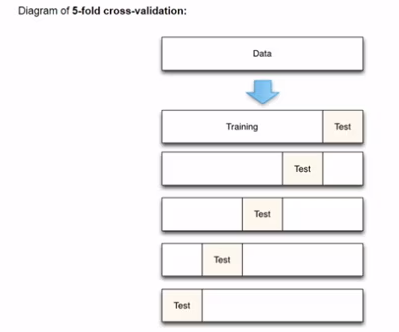

In [16]:
# train dataset используется для тренировки модели, 
# validation - для её проверки, 
# тестовый датасет выступает как ещё один уровень проверки, которая происходит на не показанных модели ранее данных

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
# точность которую показал классификатор, поочередно разбив данные на 5 частей
cvs = cross_val_score(clf, X_train, y_train, cv=5) # cv = 5 - разделить данные на 5 частей

In [20]:
cvs.mean()

0.7903081232492998

### График score с учетом кроссвалидации

In [21]:
max_depth_values = range(1, 101)
scores_data = pd.DataFrame()

In [22]:
for max_depth in notebook.tqdm(max_depth_values):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cvs = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 
                                    'test_score': [test_score], 'cross_val_score': [mean_cvs]})
    
    scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
1,2,0.805369,0.776271,0.770196
2,3,0.823826,0.820339,0.790322
3,4,0.833893,0.823729,0.790308
4,5,0.842282,0.806780,0.793669


In [24]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', value_name='score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.842282


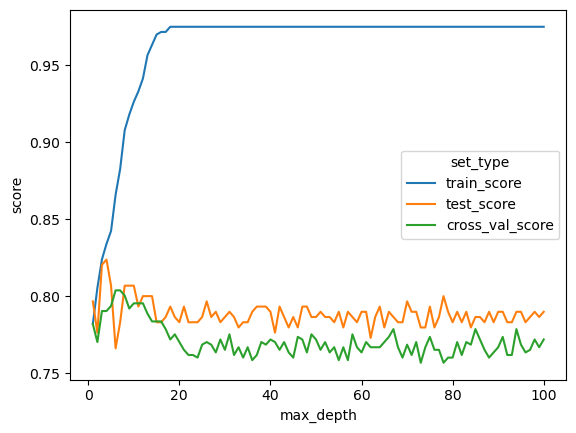

In [25]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

In [26]:
# наилучшие средние показатели cross_val_score
scores_data_long.query("set_type == 'cross_val_score'").sort_values('score', ascending=False).head()

,max_depth,set_type,score
205,6,cross_val_score,0.803754
206,7,cross_val_score,0.803739
207,8,cross_val_score,0.800364
211,12,cross_val_score,0.795350
209,10,cross_val_score,0.795322


In [27]:
# Проверка score(доля верных ответов) лучшего классификатора на тестовых данных
best_depth = scores_data_long.query("set_type == 'cross_val_score'").sort_values('score', ascending=False)['max_depth'].iloc[0]
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

best_clf.fit(X_train, y_train)

best_clf.score(X_test, y_test)

0.7694915254237288

### Задачи

**1)**  
Отметьте верные утверждения об обучении моделей  
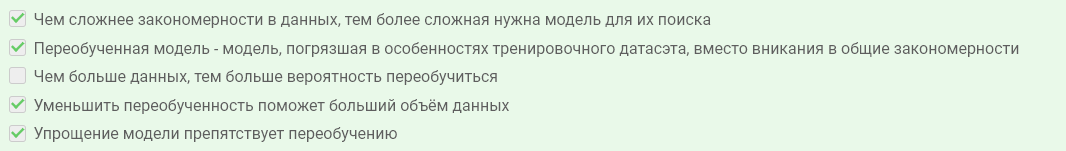

**2)**  
Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)

In [28]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
print(iris_train.shape)
iris_train.head()

(100, 5)


,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [29]:
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
print(iris_test.shape)
iris_test.head()

(50, 5)


,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [30]:
max_depth_values = range(1, 100)
iris_scores_data = pd.DataFrame()

X_train = iris_train.iloc[:, :4]
y_train = iris_train.iloc[:, 4]

X_test = iris_test.iloc[:, :4]
y_test = iris_test.iloc[:, 4]

In [31]:
rs = np.random.seed(0)

for max_depth in notebook.tqdm(max_depth_values):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    iris_scores_data = pd.concat([iris_scores_data, temp_score_data], ignore_index=True)

  0%|          | 0/99 [00:00<?, ?it/s]

In [32]:
iris_scores_data_long = pd.melt(iris_scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'], 
                           var_name='set_type', value_name='score')
iris_scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


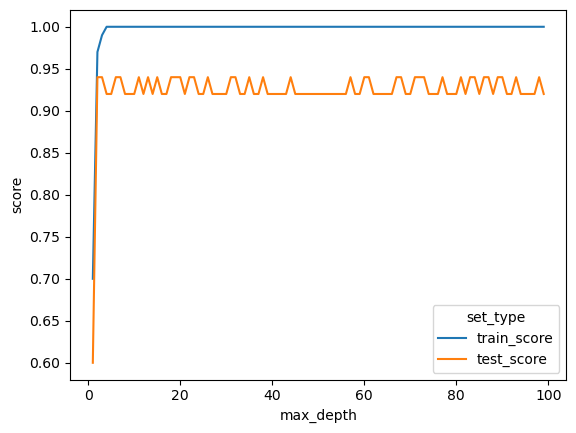

In [33]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=iris_scores_data_long)
plt.show()

**3)**  
Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.  

In [34]:
dog_n_cats_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
print(dog_n_cats_df.shape)
dog_n_cats_df.head()

(1000, 6)


,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [35]:
X = dog_n_cats_df.iloc[: , :-1]
y = dog_n_cats_df.iloc[:, -1]

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [37]:
X_test = pd.read_json('dataset_209691_15.txt')
X_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,25,30.0,1,1,0
1,17,20.4,1,1,0
2,19,22.8,1,1,0
3,23,27.6,0,1,0
4,28,33.6,1,1,0


In [38]:
pred = clf.predict(X_test)

In [39]:
(pred == 'собачка').sum()

40

## 2.5 Метрики качества модели<a id='2.5'></a> 

**TP** - true positive,  
**FP** - false positive,  
**TN** - true negative,  
**FN** - false negative.  

**Precision** - точность. Доля объектов, названными классификатором положительными и при этом действительно являющимися положительными (сколько найденно положительных примеров без "ложных" срабатываний).   
**Recall** - полнота. Это то, какую долю объектов положительного класса из всех объектов положительного класса нашёл алгоритм (насколько получилось найти все положительные примеры).  

**F-мера** - учитывает как точность, так и полноту. Особенно полезна в случаях несбалансированного распределения классов.   
**F1 score = (2 * Precision * Recall) / (Precision + Recall)**.

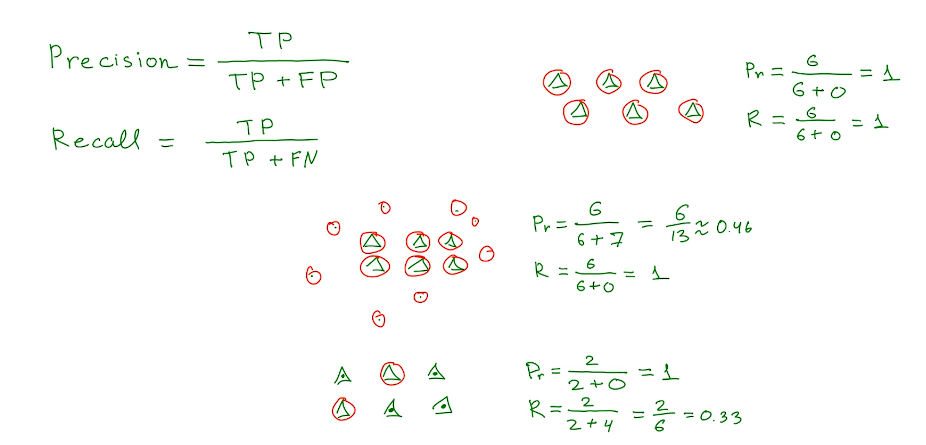  
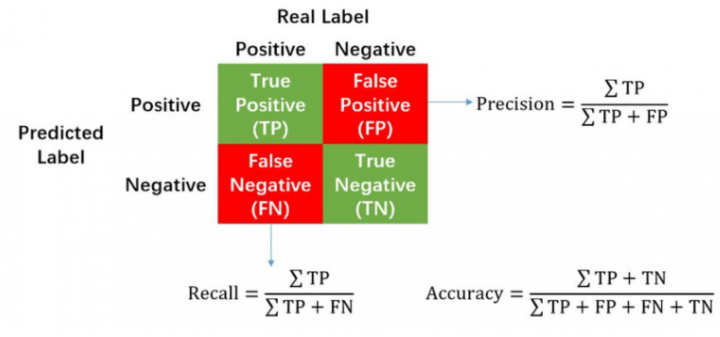  
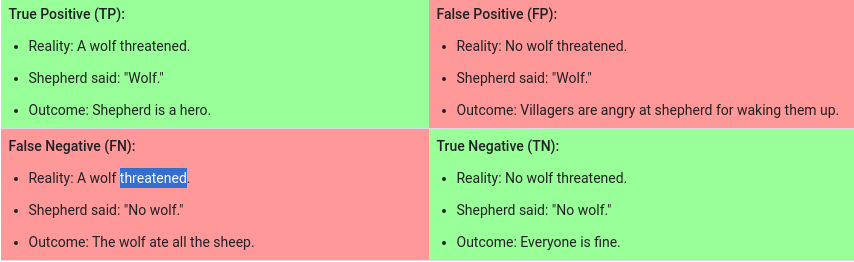

### Задачи

**1)**  
Возвращаемся к дэйтингу, некий Анатолий зарегистрировался в приложении знакомств, некий алгоритм на основе машинного обучения порекомендовал Анатолию 30 фотографий из 100. Анатолий лайкнул 15 фотографий из 30 предложенных, в дальнейшем выяснилось, что Анатолий мог бы лайкнуть еще 30 фотографий из 70 непредложенных.

Будем считать, что  лайк Анатолия является положительным исходом, а отсутствие лайка - отрицательным. Соответственно предсказанный лайк, совпавший с реальным - True positive, предсказанный лайк, не завершившийся реальным лайком - False positive и т. д. Давайте оценим работу алгоритма с точки зрения метрик качества модели.

In [40]:
from sklearn import tree
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import notebook

In [41]:
confusion_matrix = pd.DataFrame(data={'Predicted likes':[15, 15], 
                   'Predicted dislikes':[30,40]},
                    index=['Real likes','Real dislikes'])
confusion_matrix

,Predicted likes,Predicted dislikes
Real likes,15,30
Real dislikes,15,40


In [42]:
TP = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[1,0]
FN = confusion_matrix.iloc[0,1]
TN = confusion_matrix.iloc[1,1]

In [43]:
precision = TP / (TP+FP)
recall = TP / (TP+FN)

F1_score = (2*recall*precision) / (recall+precision)

print('Проанализировав отношения Анатолия с алгоритмом машинного обучения можно сделать следующий вывод,')
print('precision равняется', precision)
print('recall равняется', recall)
print('F1 score равняется', F1_score)

Проанализировав отношения Анатолия с алгоритмом машинного обучения можно сделать следующий вывод,
precision равняется 0.5
recall равняется 0.3333333333333333
F1 score равняется 0.4


**2)**  
Допустим, мы установили сканер отпечатков пальцев на вход в Институт биоинформатики, теперь любой студент может приложить палец и попасть внутрь. Однако сканер иногда допускает ошибки как первого так и второго рода. 

Служба охраны переживает и очень не хочет, чтобы посторонние люди были распознаны, как студенты. Какую метрику необходимо максимизировать в таком случае.

Будем считать, что

* True positive - студент института был действительно распознан как студент.
* False positive - не студент института был распознан как студент.   

**Ответ:** Precision (Precision это что бы точно никто лишний не зашел. А Recall что бы точно все студенты зашли)

**3)**  
Укажите какой параметр важнее в различных задачах. Помните, precision более важен в ситуациях, где не нужны ложные положительные срабатывания, а recall - там, где не нужны ложные отрицательные.

Например, если руководство страны пытается предотвратить эпидемию, и решило бесплатно выдавать лекарства всем заболевшим, то более важно будет покрыть всю заболевшую аудиторию == минимизировать случаи, когда больной считается здоровым == увеличить recall

Возможно чуть более понятная интерпретация этих метрик:
В поисковых системах, precision - соответствие выданной страницы запросу пользователя, а recall - доля выданных соответствующих страниц к доле всех соответствующих страниц.  

1) Компания не имеет ресурсы, чтобы осматривать каждый астероид  

2) Мобильное приложение должно идентифицировать именно пользователь и никого иного  

3) Так как школа щедрая, она может позволить себе захватить пару не талантливых детей, это не критично  

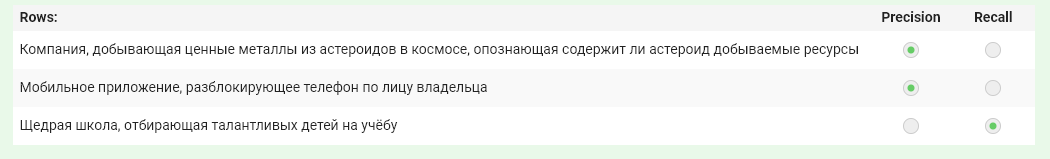

**4)**  
Укажите верные высказывания:  

1) Precision и recall не могут быть равны - Неверно. Precision и recall могут быть равны в некоторых ситуациях.  

2) Precision, recall и accuracy могут быть равны 1 в случае безошибочной классификации - Верно. Если классификационная модель идеально предсказывает все классы, то точность (precision), полнота (recall) и общая точность (accuracy) будут равны 1.  

3) F1 score может быть равен нулю - Верно. F1 score может быть равен нулю, если либо precision, либо recall равны нулю, поскольку F1 score является гармоническим средним между precision и recall. Например, если модель не идентифицирует ни одного истинно положительного случая, recall будет равен 0, что приведет к F1 score, равному 0.  

4) Высокий скор accuracy не всегда говорит о качестве модели в случае неравномерного распределения классов - Верно. В случае, когда один класс значительно преобладает над другим (например, в сильно несбалансированных данных), высокая общая точность (accuracy) может быть вводящей в заблуждение. Модель может просто всегда предсказывать наиболее часто встречающийся класс и при этом иметь высокую точность, но быть практически бесполезной.

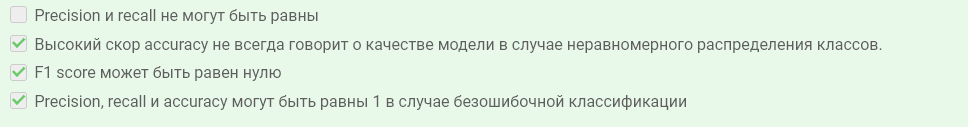  

**5)**  
Поупражняемся в расчётах precision. В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную precision.

Если он будет недостаточно высок, потюньте немного модель.  

In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [45]:
songs_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
print(songs_df.shape)
songs_df.head()

(360, 10)


,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [46]:
X = songs_df.iloc[:,5:]
X.head()

,length,commas,exclamations,colons,hyphens
0,1300,24,5,0,11
1,1566,0,0,0,0
2,996,1,0,1,0
3,2868,5,0,0,0
4,3351,22,0,0,3


In [47]:
y = songs_df['artist']
y.head()

0         gangstarr
1    blind-guardian
2    blind-guardian
3    blind-guardian
4         gangstarr
Name: artist, dtype: object

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [49]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [50]:
predictions = clf.predict(X_test)

In [51]:
precision = precision_score(y_test, predictions, average='micro')
precision

0.6218487394957983

## 2.6 Подбор параметров и ROC<a id='2.6'></a> 

In [3]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import tree
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import notebook

In [4]:
titanic_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
median_age = X.groupby('Sex')['Age'].transform('median')
X = X.fillna({'Age': median_age})
X = pd.get_dummies(X)
y = titanic_data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
clf = tree.DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'], 'max_depth': range(1,30)}

In [6]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [7]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [8]:
best_clf = grid_search_cv_clf.best_estimator_

In [9]:
print('score', best_clf.score(X_test, y_test))

y_pred = best_clf.predict(X_test)

print('precision', precision_score(y_test, y_pred, average='micro'))
print('recall', recall_score(y_test, y_pred, average='macro'))
print('F1', f1_score(y_test, y_pred, average='weighted'))

score 0.7864406779661017
precision 0.7864406779661017
recall 0.7597619047619047
F1 0.7799352757668172


In [10]:
# вероятность отнесения к одному из классов
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.86734694, 0.13265306],
       [0.86734694, 0.13265306],
       [0.86734694, 0.13265306],
       [0.        , 1.        ],
       [0.59259259, 0.40740741],
       [1.        , 0.        ],
       [0.35714286, 0.64285714],
       [0.86734694, 0.13265306],
       [0.35714286, 0.64285714],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.93243243, 0.06756757],
       [1.        , 0.        ],
       [0.86734694, 0.13265306],
       [0.93243243, 0.06756757],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.59259259, 0.40740741],
       [0.86734694, 0.13265306],
       [1.        , 0.        ],
       [0.86734694, 0.13265306],
       [0.65384615, 0.34615385],
       [0.59259259, 0.40740741],
       [0.86734694, 0.13265306],
       [0.86734694, 0.13265306],
       [1.        , 0.        ],
       [0.65384615, 0.34615385],
       [0.86734694, 0.13265306],
       [1.        , 0.        ],
       [0.59259259, 0.40740741],
       [0.

<Axes: >

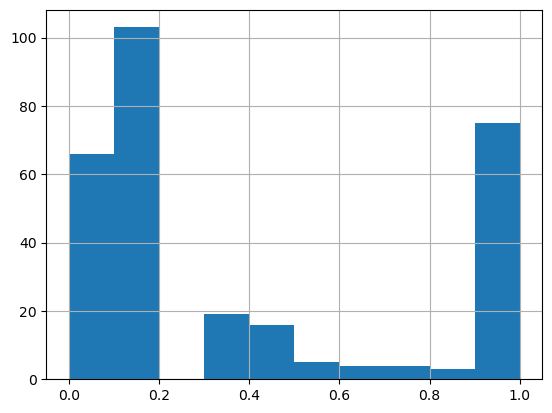

In [11]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [12]:
# если вероятность выжить более 0.8, то относить пассажира к классу выживших
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

In [13]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

In [14]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

In [15]:
# precision стал выше, recall уменьшился
print('precision', precision_score(y_test, y_pred, average='micro'))
print('recall', recall_score(y_test, y_pred, average='macro'))

precision 0.7830508474576271
recall 0.7464285714285714


In [16]:
# если вероятность выжить более 0.2, то относить пассажира к классу выживших
y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)

In [17]:
# precision уменьшился, но увеличился recall
print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))

precision 0.7698412698412699
recall 0.8083333333333333


### ROC curve

In [18]:
from sklearn.metrics import roc_curve, auc

1) ROC-кривая позволяет отобразить на одном графике результаты большого числа матриц ошибок (confusion matrix) в зависимости от различного уровня порога отсечения бинарных классов (хотя дерево решений может использоваться и для небинарной классификации)

2) ось y - TPR(=Recall=Полнота или Чувствительность=TP/(TP+FN)), на ось x может быть выведен или FPR=1-Specificity=1-TN/(TN+FP), или Precision=TP/(TP+FP) - тот или иной показатель используется в зависимости от отсутствия или наличия дисбаланса классов.

3) AUC = area under the curve = интегральный показатель площади под кривой [0;1], AUC=0,5 - дерево не лучше случайного распределения

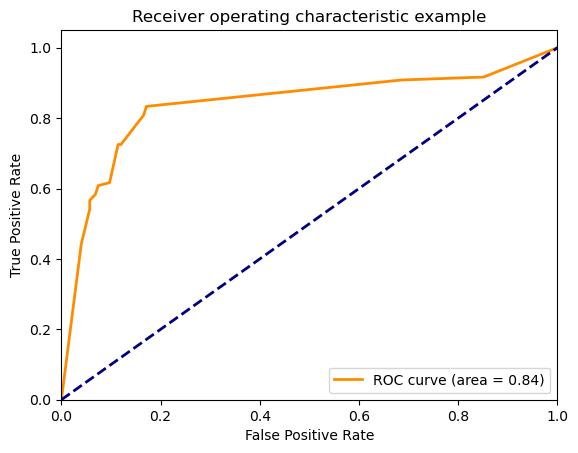

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# TPR - recall - какой % выживших пассажиров были классифицированы как выжившие
# FPR - какой % пассажиров которые не выжили, были классифицированы как выжившие
# чем ближе кривая к диагональной линии, тем хуже работает классификатор

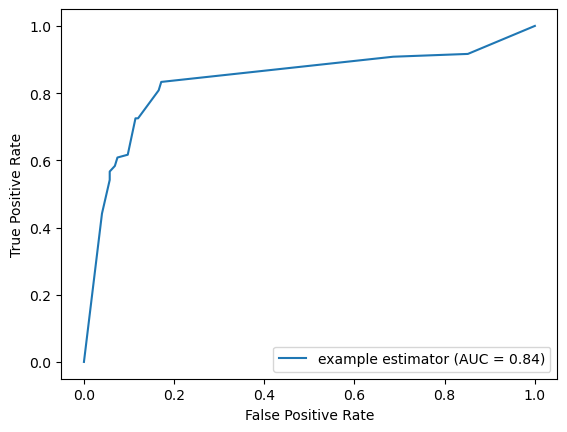

In [20]:
from sklearn import metrics

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

## 2.7 Практика, Scikit-learn, fit, predict<a id='2.7'></a> 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy

In [16]:
from sklearn.datasets import load_iris

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**1)**  
Cоздайте Decision Tree классификатор, используя одноимённый класс из библиотеки sklearn и сохраните его в переменную dt.  

У дерева должны быть следующие параметры:  
* максимальная глубина - 5 уровней  
* минимальное число образцов в вершине для разделения - 5  

In [17]:
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)

**2)**  
Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.  

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.
 
В ответе необходимо указать число с точностью 3 знака после запятой.  

In [18]:
heart_disease_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
print(heart_disease_df.shape)
heart_disease_df.head()

(238, 3)


,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [19]:
X = heart_disease_df[['sex', 'exang']]
y = heart_disease_df[['num']]

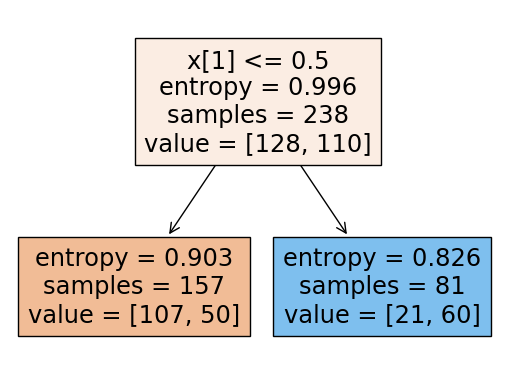

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=5)
clf.fit(X,y)

tree.plot_tree(clf, filled=True)
plt.show()

In [21]:
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
r_node = clf.tree_.children_right[0]

N = heart_disease_df.shape[0] # всего пациентов
p1 = clf.tree_.value[0][0][0] # всего класс 1
p0 = clf.tree_.value[0][0][1] # всего класс 0

E_y = entropy([p1/N, p0/N], base=2) # общая энтропия
print('E_y', E_y)

n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
n0 = clf.tree_.n_node_samples[r_node]

e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
e0 = clf.tree_.impurity[r_node] 

E_X_Y = n1/N * e1 + n0/N * e0
print('E_X_Y', E_X_Y)

E_y 0.9958699965528488
E_X_Y 0.8764765931139329


In [22]:
IG = E_y - ((n1/N) * e1 + (n0/N) * e0)
np.round(IG, 3)

0.119

**3)**  
Укажите верные утверждения:  

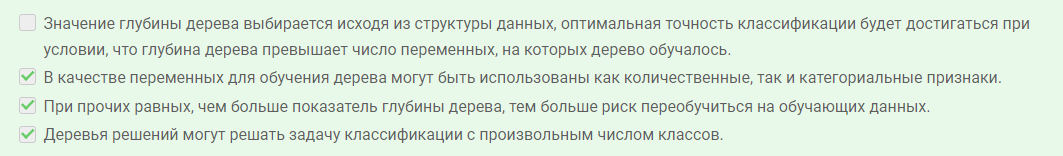

**4)**  
Ярослав обучил дерево решений на обучающей выборке и получил 100% точность классификатора, однако на тестовых данных точность классификатора едва превышала 50%, очевидно, что Ярослав пал жертвой переобучения.  

Какие действия могут помочь в данной ситуации?
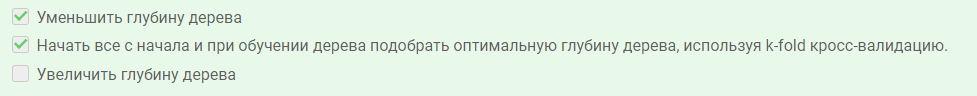

**5)**  
Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!  

Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.  

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.  
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [23]:
iris = load_iris()

In [24]:
X = iris.data
y = iris.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
predicted = dt.predict(X_test)
predicted

array([1, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2])

**6)**  
Теперь задачка на соотнесение функций sklearn и стратегий разделения датасэта для тестирования.  
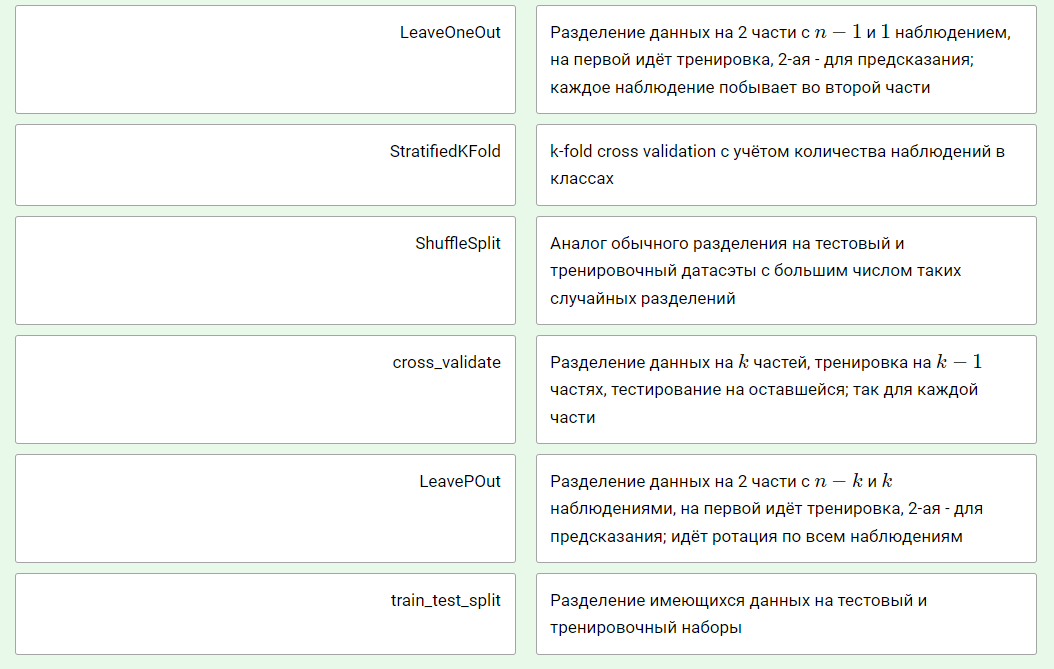  

**7)**  
В продолжение предыдущего вопроса - расположите разные стратегии разделения данных для кросс-валидации по затратам вычислительных мощностей на последующие предсказания. Сверху самый быстрый и требующий меньше всего вычислений для валидации.  


*Такой порядок связан с количеством последующих прогонов через модель: в обычном сплите получается всего 1 пара train и test datasets, в k-fold кросс-валидации их будет уже k, а в leave-one-out - по числу наблюдений.*

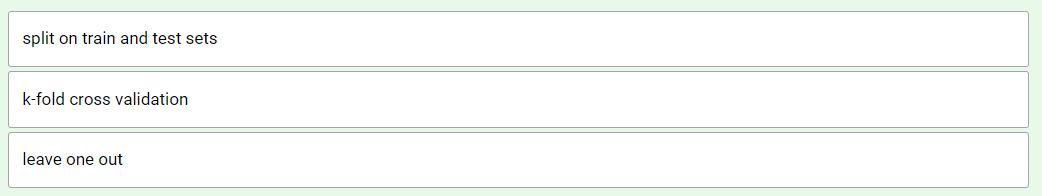

**8)**  
Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор подходящего.
Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими параметрами.
Это применимо не только к деревьям, но и к другим моделям sklearn.  

Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:  
* максимальная глубина - от 1 до 10 уровней  
* минимальное число проб для разделения - от 2 до 10  
* минимальное число проб в листе - от 1 до 10  

и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search  

In [28]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [29]:
dt = DecisionTreeClassifier()

In [30]:
parameters = {'max_depth': range(1,11),
              'min_samples_split': range(2,11),
              'min_samples_leaf': range(1,11)}

In [31]:
%%time
search = GridSearchCV(dt, parameters, cv=5)
search.fit(X_train, y_train)

CPU times: total: 6.08 s
Wall time: 6.25 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [32]:
search.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [33]:
best_tree = search.best_estimator_

**9)**  
Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.  

Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV  
* максимальная глубина - от 1 до 10 уровней  
* минимальное число проб для разделения - от 2 до 10  
* минимальное число проб в листе - от 1 до 10  

Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [34]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [35]:
dt = DecisionTreeClassifier()

In [36]:
parameters = {'max_depth': range(1,11),
              'min_samples_split': range(2,11),
              'min_samples_leaf': range(1,11)}

In [37]:
%%time
search = RandomizedSearchCV(dt, parameters, cv=5)
search.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 81.8 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 11),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [38]:
search.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}

In [39]:
best_tree = search.best_estimator_

**10)**  
Даны 2 датасэта, к которым вы можете обращаться:  

    train - размеченный с известными правильным ответами (хранятся в колонке y)  
    test - набор, где нужно предсказать их  
Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту! Границы параметров как раньше:  

* максимальная глубина - от 1 до 10 уровней  
* минимальное число проб для разделения - от 2 до 10  
* минимальное число проб в листе - от 1 до 10  

Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [40]:
"""X_train = train.drop('y', axis=1)
y_train = train['y']

dt = DecisionTreeClassifier()

parameters = {'max_depth': range(1,11),
              'min_samples_split': range(2,11),
              'min_samples_leaf': range(1,11)}

search = GridSearchCV(dt, parameters, cv=5)
search.fit(X_train, y_train)

best_tree = search.best_estimator_

predictions = best_tree.predict(test)"""

"X_train = train.drop('y', axis=1)\ny_train = train['y']\n\ndt = DecisionTreeClassifier()\n\nparameters = {'max_depth': range(1,11),\n              'min_samples_split': range(2,11),\n              'min_samples_leaf': range(1,11)}\n\nsearch = GridSearchCV(dt, parameters, cv=5)\nsearch.fit(X_train, y_train)\n\nbest_tree = search.best_estimator_\n\npredictions = best_tree.predict(test)"

**11)**  
При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу из 4-ёх (в случае бинарной классификации) этих параметров называют confusion matrix.  

В sklearn можно её удобно получить с помощью функции confusion_matrix. Вам даны 2 эррея с истинными классами наблюдений и предсказанными - y и predictions. Получите по ним confusion matrix и поместите её в переменную conf_matrix.  


In [41]:
y = [1, 0, 1, 1, 0, 1]
predictions = [0, 0, 1, 1, 0, 1]

In [42]:
conf_matrix = confusion_matrix(y, predictions)
conf_matrix

array([[2, 0],
       [1, 3]], dtype=int64)

In [43]:
# true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

**12)**  
Соотнесите описание метрик, которые выводятся из 4-ёх основных параметров, с их названиями.  
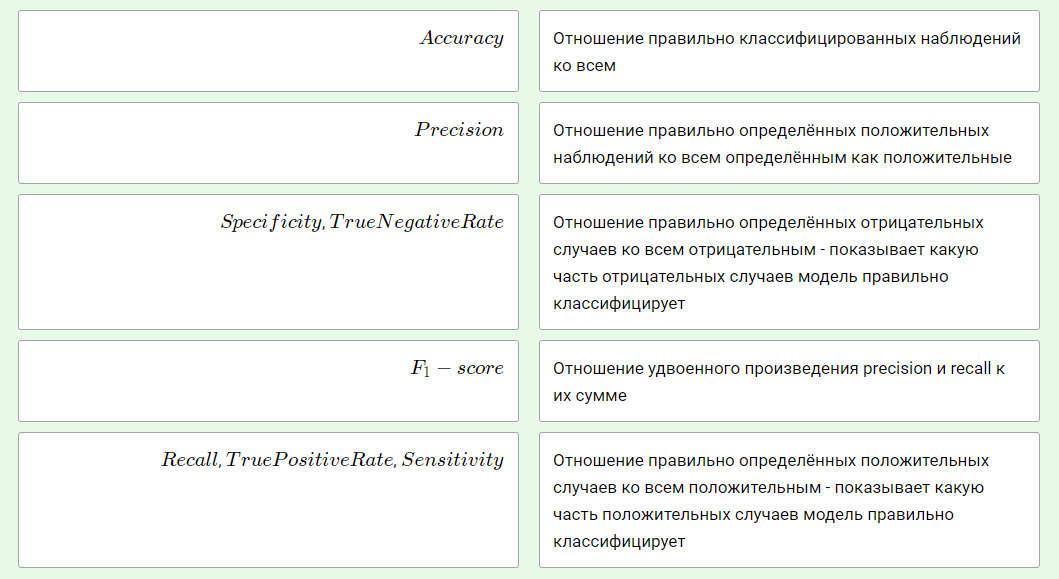